## Importing data

In [145]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
from numpy.polynomial import Polynomial
from sklearn import preprocessing

In [2]:
rr_data = pd.DataFrame(pd.read_csv("data/data_RR_merged_20190108.csv"))
m_data = pd.DataFrame(pd.read_csv("data/data_M_merged_20190108.csv"))

In [3]:
# get indices with warmup rounds
rr_indexNames = rr_data[rr_data['round'] == 'warmup'].index
# delete these row indexes from the frame
rr_data.drop(rr_indexNames, inplace=True)

# get indices with warmup rounds
m_indexNames = m_data[m_data['round'] == 'warmup'].index
# delete these row indexes from the frame
m_data.drop(m_indexNames, inplace=True)

In [4]:
# preview rr data
rr_data.head()

,ID,index_runner,side_runner,square_runner,python_tijd,spel,permutation,round,level,times_level_played_before,...,costheta,mabc_percentile_score,mabc_binary_score,gender,age_precise,ax_f,ay_f,az_f,acc,jerk
6267,101,23,2,5,1.497942e+09,RR,1,level_A,0,1,...,0.892647,37.0,0,1,7.009042,10.051521,0.465580,-0.175396,10.063826,0.486787
6268,101,23,2,5,1.497942e+09,RR,1,level_A,0,1,...,0.892970,37.0,0,1,7.009042,10.054876,0.492001,-0.189980,10.068699,0.426291
6269,101,23,2,5,1.497942e+09,RR,1,level_A,0,1,...,0.895913,37.0,0,1,7.009042,10.057725,0.516986,-0.204504,10.073080,0.366575
6270,101,23,2,5,1.497942e+09,RR,1,level_A,0,1,...,0.898400,37.0,0,1,7.009042,10.060076,0.540607,-0.218956,10.076970,0.205269
6271,101,23,2,5,1.497942e+09,RR,1,level_A,0,1,...,0.897208,37.0,0,1,7.009042,10.061938,0.562936,-0.233327,10.080374,0.166991


In [5]:
# preview m data
m_data.head()

,ID,index_runner,side_runner,square_runner,python_tijd,spel,round,level,times_level_played_before,incorrect,mabc_percentile_score,mabc_binary_score,gender,age_precise,ax_f,ay_f,az_f,acc,jerk
5959,101,4,0,4,1.497942e+09,M,level_A,0,1,0,37.0,0,1,7.009042,2.590391,-1.496124,-9.477220,9.938119,0.096884
5960,101,4,0,4,1.497942e+09,M,level_A,0,1,0,37.0,0,1,7.009042,2.562202,-1.482067,-9.485622,9.936721,0.086015
5961,101,4,0,4,1.497942e+09,M,level_A,0,1,0,37.0,0,1,7.009042,2.534205,-1.468358,-9.493919,9.935430,0.111047
5962,101,4,0,4,1.497942e+09,M,level_A,0,1,0,37.0,0,1,7.009042,2.506382,-1.455013,-9.502127,9.934255,0.091310
5963,101,4,0,4,1.497942e+09,M,level_A,0,1,0,37.0,0,1,7.009042,2.478715,-1.442047,-9.510264,9.933209,0.055894


In [6]:
# returns values of dictionary in a list
def dict_to_x_y(dictionary):
    x_list = []
    y_list = []
    for key in dictionary:
        x_list.append(dictionary[key][0])
        y_list.append(dictionary[key][1])
    return x_list, y_list

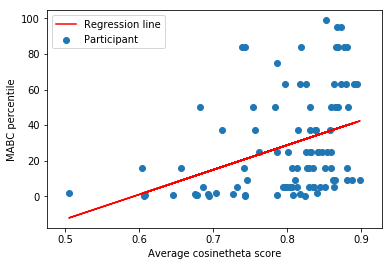

In [7]:
# ID is unique per child
# the higher the costheta score, the better the performance
# mabc_percentile_score is the label associated with the motor skills, again the higher the better

# create a dataframe containing this data
subdata = rr_data[['ID', 'costheta', 'mabc_percentile_score']]

# create a set of all unique children
children_ids = set(subdata['ID'])

# create a dictionary containing children id's as key and a tuple containing costheta and mabc_percentile as val
subdata_dictionary = {}
for child_id in children_ids:
    avg_ct = subdata.loc[subdata['ID'] == child_id]['costheta'].mean()
    mabc_perc = subdata.loc[subdata['ID'] == child_id]['mabc_percentile_score'].mean()
    subdata_dictionary[child_id] = (avg_ct, mabc_perc)
#     print("Child: {} has an avarage costheta score of {} and an MABC percentile equal to {}.".format(child_id, round(avg_ct, 5), round(mabc_perc, 3)))

avg_ct, mabc = dict_to_x_y(subdata_dictionary)
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_ct, mabc)
avg_ct_slope = [i * slope for i in avg_ct]

# scatter plot with mabc
plt.scatter(avg_ct, mabc, label='Participant')
plt.plot(avg_ct, intercept + avg_ct_slope, 'r', label='Regression line')
plt.xlabel("Average cosinetheta score")
plt.ylabel("MABC percentile")
plt.legend()


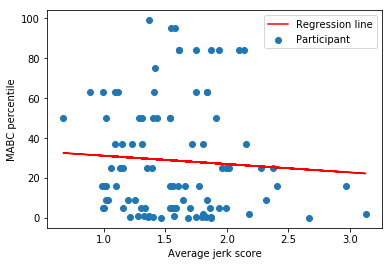

In [8]:
# ID is unique per child
# the higher the costheta score, the better the performance
# mabc_percentile_score is the label associated with the motor skills, again the higher the better

# create a dataframe containing this data
subdata_jerk = rr_data[['ID', 'jerk', 'mabc_percentile_score']]

# create a dictionary containing children id's as key and a tuple containing costheta and mabc_percentile as val
subdata_jerk_dictionary = {}
for child_id in children_ids:
    avg_jerk = subdata_jerk.loc[subdata['ID'] == child_id]['jerk'].mean()
    mabc_perc = subdata_jerk.loc[subdata['ID'] == child_id]['mabc_percentile_score'].mean()
    subdata_jerk_dictionary[child_id] = (avg_jerk, mabc_perc)
#     print("Child: {} has an avarage costheta score of {} and an MABC percentile equal to {}.".format(child_id, round(avg_ct, 5), round(mabc_perc, 3)))

avg_jerk, mabc = dict_to_x_y(subdata_jerk_dictionary)
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_jerk, mabc)
avg_jerk_slope = [i * slope for i in avg_jerk]

# scatter plot with mabc
plt.scatter(avg_jerk, mabc, label='Participant')
plt.plot(avg_jerk, intercept + avg_jerk_slope, 'r', label='Regression line')
plt.xlabel("Average jerk score")
plt.ylabel("MABC percentile")
plt.legend()


## Tijd fixen

In [9]:
rr_data_time = rr_data

times = []
for child_id in children_ids:
    child_frame = rr_data.loc[subdata['ID'] == child_id]
    mintime = child_frame['python_tijd'].min()
    fixedtime = child_frame['python_tijd'] - mintime
    times.append(fixedtime.values)
    
    
realtimes = [item for sublist in times for item in sublist]

rr_data_time.insert(4, 'real_time', realtimes)


In [10]:
rr_data_time.head(10)


,ID,index_runner,side_runner,square_runner,real_time,python_tijd,spel,permutation,round,level,...,costheta,mabc_percentile_score,mabc_binary_score,gender,age_precise,ax_f,ay_f,az_f,acc,jerk
6267,101,23,2,5,0.00,1.497942e+09,RR,1,level_A,0,...,0.892647,37.0,0,1,7.009042,10.051521,0.465580,-0.175396,10.063826,0.486787
6268,101,23,2,5,0.01,1.497942e+09,RR,1,level_A,0,...,0.892970,37.0,0,1,7.009042,10.054876,0.492001,-0.189980,10.068699,0.426291
6269,101,23,2,5,0.02,1.497942e+09,RR,1,level_A,0,...,0.895913,37.0,0,1,7.009042,10.057725,0.516986,-0.204504,10.073080,0.366575
6270,101,23,2,5,0.02,1.497942e+09,RR,1,level_A,0,...,0.898400,37.0,0,1,7.009042,10.060076,0.540607,-0.218956,10.076970,0.205269
6271,101,23,2,5,0.03,1.497942e+09,RR,1,level_A,0,...,0.897208,37.0,0,1,7.009042,10.061938,0.562936,-0.233327,10.080374,0.166991
6272,101,23,2,5,0.04,1.497942e+09,RR,1,level_A,0,...,0.898858,37.0,0,1,7.009042,10.063323,0.584044,-0.247610,10.083298,0.129659
6273,101,23,2,5,0.05,1.497942e+09,RR,1,level_A,0,...,0.896844,37.0,0,1,7.009042,10.064244,0.604002,-0.261799,10.085751,0.093369
6274,101,23,2,5,0.06,1.497942e+09,RR,1,level_A,0,...,0.896844,37.0,0,1,7.009042,10.064714,0.622877,-0.275889,10.087743,0.069849
6275,101,23,2,5,0.08,1.497942e+09,RR,1,level_A,0,...,0.895630,37.0,0,1,7.009042,10.064747,0.640736,-0.289878,10.089286,0.036418
6276,101,23,2,5,0.09,1.497942e+09,RR,1,level_A,0,...,0.893947,37.0,0,1,7.009042,10.064356,0.657642,-0.303760,10.090393,0.009958


## 012 012 

In [11]:
# # kijk naar level_A, n kopier die.
# # kijk level_B en kopier die
# # kijk level_C en kopier die frame.

# # check je frames, vind de gene met 0 bij level  en plak die in new frame.
# # 1, 2

# # repeat for next levels. 

# data_012012 = rr_data_time

# data_012012.head()

# level012012 = pd.DataFrame() #creates a new dataframe that's empty

# for child_id in children_ids:
#     child_frame = data_012012.loc[data_012012['ID'] == child_id]
# #     print(child_frame)
#     level_A = child_frame.loc[child_frame['round'] == 'level_A']
#     level_A_level = int(level_A['level'].mean())
#     level_B = child_frame.loc[child_frame['round'] == 'level_B']
#     level_B_level = int(level_B['level'].mean())
#     level_C = child_frame.loc[child_frame['round'] == 'level_C']
#     level_C_level = int(level_C['level'].mean())
#     level_D = child_frame.loc[child_frame['round'] == 'level_D']
#     level_D_level = int(level_D['level'].mean())
#     level_E = child_frame.loc[child_frame['round'] == 'level_E']
#     level_E_level = int(level_E['level'].mean())
#     level_F = child_frame.loc[child_frame['round'] == 'level_F']
#     level_F_level = int(level_F['level'].mean())
    
#     frames = [level_A, level_B, level_C, level_D, level_E, level_F]
#     levels = [level_A_level, level_B_level, level_C_level, level_D_level, level_E_level, level_F_level]
    
#     level0 = frames[levels.index(0)]
#     level1 = frames[levels.index(1)]
#     level2 = frames[levels.index(2)]
#     level3 = frames[[i for i, n in enumerate(levels) if n == 0][1]]
#     level4 = frames[[i for i, n in enumerate(levels) if n == 1][1]]
#     level5 = frames[[i for i, n in enumerate(levels) if n == 2][1]]

#     level012012 = level012012.append(level0, ignore_index = True)
#     level012012 = level012012.append(level1, ignore_index = True)
#     level012012 = level012012.append(level2, ignore_index = True)
#     level012012 = level012012.append(level3, ignore_index = True)
#     level012012 = level012012.append(level4, ignore_index = True)
#     level012012 = level012012.append(level5, ignore_index = True)
    
#     print("Done ", child_id)

In [12]:

data_001122 = rr_data_time

newtimelist = []

for child_id in children_ids:
    child_frame = data_001122.loc[data_001122['ID'] == child_id]

    level_00_1 = child_frame.loc[(child_frame['snelheid'] == 0.4) & (child_frame['times_level_played_before'] == 1)]
    level_00_2 = child_frame.loc[(child_frame['snelheid'] == 0.4) & (child_frame['times_level_played_before'] == 2)]
    level_11_1 = child_frame.loc[(child_frame['snelheid'] == 0.6) & (child_frame['times_level_played_before'] == 1)]
    level_11_2 = child_frame.loc[(child_frame['snelheid'] == 0.6) & (child_frame['times_level_played_before'] == 2)]
    level_22_1 = child_frame.loc[(child_frame['snelheid'] == 0.8) & (child_frame['times_level_played_before'] == 1)]
    level_22_2 = child_frame.loc[(child_frame['snelheid'] == 0.8) & (child_frame['times_level_played_before'] == 2)]
    
    level_00 = list(level_00_1['real_time'] - level_00_1['real_time'].min()) + (list(level_00_2['real_time'] - level_00_2['real_time'].min()))
    level_11 = list(level_11_1['real_time'] - level_11_1['real_time'].min()) + (list(level_11_2['real_time'] - level_11_2['real_time'].min()))
    level_22 = list(level_22_1['real_time'] - level_22_1['real_time'].min()) + (list(level_22_2['real_time'] - level_22_2['real_time'].min()))
    
    newtimelist += level_00 + level_11 + level_22

data_001122.insert(4, 'time_resetted_each_round', newtimelist) 
    

In [32]:
data_001122.head(10)

,ID,index_runner,side_runner,square_runner,time_resetted_each_round,real_time,python_tijd,spel,permutation,round,...,costheta,mabc_percentile_score,mabc_binary_score,gender,age_precise,ax_f,ay_f,az_f,acc,jerk
6267,101,23,2,5,0.00,0.00,1.497942e+09,RR,1,level_A,...,0.892647,37.0,0,1,7.009042,10.051521,0.465580,-0.175396,10.063826,0.486787
6268,101,23,2,5,0.01,0.01,1.497942e+09,RR,1,level_A,...,0.892970,37.0,0,1,7.009042,10.054876,0.492001,-0.189980,10.068699,0.426291
6269,101,23,2,5,0.01,0.02,1.497942e+09,RR,1,level_A,...,0.895913,37.0,0,1,7.009042,10.057725,0.516986,-0.204504,10.073080,0.366575
6270,101,23,2,5,0.02,0.02,1.497942e+09,RR,1,level_A,...,0.898400,37.0,0,1,7.009042,10.060076,0.540607,-0.218956,10.076970,0.205269
6271,101,23,2,5,0.03,0.03,1.497942e+09,RR,1,level_A,...,0.897208,37.0,0,1,7.009042,10.061938,0.562936,-0.233327,10.080374,0.166991
6272,101,23,2,5,0.04,0.04,1.497942e+09,RR,1,level_A,...,0.898858,37.0,0,1,7.009042,10.063323,0.584044,-0.247610,10.083298,0.129659
6273,101,23,2,5,0.04,0.05,1.497942e+09,RR,1,level_A,...,0.896844,37.0,0,1,7.009042,10.064244,0.604002,-0.261799,10.085751,0.093369
6274,101,23,2,5,0.05,0.06,1.497942e+09,RR,1,level_A,...,0.896844,37.0,0,1,7.009042,10.064714,0.622877,-0.275889,10.087743,0.069849
6275,101,23,2,5,0.06,0.08,1.497942e+09,RR,1,level_A,...,0.895630,37.0,0,1,7.009042,10.064747,0.640736,-0.289878,10.089286,0.036418
6276,101,23,2,5,0.07,0.09,1.497942e+09,RR,1,level_A,...,0.893947,37.0,0,1,7.009042,10.064356,0.657642,-0.303760,10.090393,0.009958


In [235]:
def mabc_to_arr(i):
    lb = preprocessing.LabelBinarizer()
    lb.fit(list(range(0, 3)))
    return (lb.transform([i])[0])


In [236]:
X = []
Y = []

# print(X)

for child_id in children_ids:
    child_frame = data_001122.loc[(data_001122['ID'] == child_id) & (data_001122['snelheid'] == 0.4)]
    
    child_frame_1 = child_frame.loc[(child_frame['times_level_played_before'] == 1)]
    times_1 = list(child_frame_1['time_resetted_each_round'])
    costheta_1 = list(child_frame_1['costheta'])
    
    child_frame_2 = child_frame.loc[(child_frame['times_level_played_before'] == 2)]
    times_2 = list(child_frame_2['time_resetted_each_round'])
    costheta_2 = list(child_frame_2['costheta'])
    
    mabc_percentile = list(child_frame['mabc_percentile_score'].head(1))[0]
    mabc_binary = list(child_frame['mabc_binary_score'].head(1))[0]
    
    p = Polynomial.fit(times_1, costheta_1, 7)
    values_polynomial = np.array(p.linspace()[0])


    
    X.append(values_polynomial)
    Y.append(mabc_to_arr(int(mabc_binary)))

X = np.array(X)
Y = np.array(Y)
    
#     # UNCOMMENT TO PLOT
#     if list(child_frame['mabc_binary_score'].head(1))[0]:
#         color = 'red'
#         label = 'low'
#         weight = (100 - mabc_percentile)/100
#     else:
#         color = 'green'
#         label = 'well'
#         weight = mabc_percentile/100
    
#     plt.plot(*p.linspace(), linewidth=4, color=color, label="polyfit")
#     plt.rcParams["figure.figsize"] = (17, 14)
#     plt.plot(times_1, costheta_1, color, alpha=alphanum, label="first round of a {}-performing child (MABC {})".format(label, mabc_percentile))
#     plt.plot(times_2, costheta_2, color, alpha=alphanum, label="second round of {}-performing child (MABC {})".format(label, mabc_percentile))
#     plt.title('0.4 Speed rounds of child {}'.format(child_id))
#     plt.xlabel('Time in seconds')
#     plt.ylabel('Cosinetheta Score')
#     plt.legend()
#     plt.show()
    

In [237]:
print(np.shape(X))
print(np.shape(Y))


print(Y)

(96, 100)
(96, 3)
[[1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [247]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = MLPClassifier(hidden_layer_sizes=(96,96,3), max_iter=1000, alpha=0.0002,
                     solver='adam', activation='identity', verbose=1,tol=0.0000000000001)
clf.fit(np.array(X), np.array(Y))

# y_pred = clf.predict(np.array(X))

Iteration 1, loss = 17.90390312
Iteration 2, loss = 2.17220752
Iteration 3, loss = 6.68363275
Iteration 4, loss = 8.80309996
Iteration 5, loss = 8.49340275
Iteration 6, loss = 6.48292643
Iteration 7, loss = 3.85035554
Iteration 8, loss = 1.60366404
Iteration 9, loss = 3.48311876
Iteration 10, loss = 4.62556776
Iteration 11, loss = 4.62821787
Iteration 12, loss = 3.69295813
Iteration 13, loss = 2.24902468
Iteration 14, loss = 1.65391625
Iteration 15, loss = 2.80366746
Iteration 16, loss = 3.23155432
Iteration 17, loss = 2.82296634
Iteration 18, loss = 1.74828336
Iteration 19, loss = 1.59648548
Iteration 20, loss = 2.37181853
Iteration 21, loss = 2.54888453
Iteration 22, loss = 2.10302551
Iteration 23, loss = 1.45340595
Iteration 24, loss = 1.70204017
Iteration 25, loss = 2.13979766
Iteration 26, loss = 2.01254097
Iteration 27, loss = 1.50634782
Iteration 28, loss = 1.49968247
Iteration 29, loss = 1.85984006
Iteration 30, loss = 1.85202656
Iteration 31, loss = 1.50827613
Iteration 32, lo

MLPClassifier(activation='identity', alpha=0.0002, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(96, 96, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-13,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
# Cosinus gemiddeld per ronde van alle kids (Casper)
print(data_001122.groupby('level', as_index=False)['costheta'].mean())
print(list(data_001122.groupby('level', as_index=False)['costheta'].mean()['costheta']))

# get all names and average cosine
names_rounds = list(data_001122.groupby('level', as_index=False)['costheta'].mean()['level'])
cos_rounds = list(data_001122.groupby('level', as_index=False)['costheta'].mean()['costheta'])

# ik krijg hier gvd geen normale schaalverdeling bij. Ylim werkt niet kutzooi
# er is iig correlatie
plt.bar(names_rounds, cos_rounds, alpha = 0.8)
plt.title('Average cosine per round')
plt.xlabel('Group')
plt.ylabel('Cosine')
# uncomment for save:
# plt.savefig('plots/avg_cos_per_round.png', dpi=100)
plt.show()


# same with logarithmic scale
plt.bar(names_rounds, cos_rounds, alpha = 0.8, log=True)
plt.title('Average cosine per round')
plt.xlabel('Group')
plt.ylabel('logarithmic Cosine')
# uncomment for save:
# plt.savefig('plots/avg_cos_per_round_logscale.png', dpi=100)
plt.show()

# Easy diagrams for report

In [ ]:
# BAR CHART average cosinus_theta / permutation
permutations = sorted(rr_data['permutation'].unique())

means = []
for p in permutations:
    thispermutation = rr_data.loc[rr_data['permutation'] == p]
    means.append(thispermutation['costheta'].mean())
    
    
plt.bar(permutations, means, log=True)
plt.xlabel('Permutation')
plt.ylabel('cosinus theta')
plt.title('average cosinus_theta / permutation')
plt.savefig('plots/cosine_permutation.png', dpi=100)
plt.show()

In [ ]:
## get dataframe with only IDs for Average age
ids = rr_data['ID'].unique()
rr_data_id = rr_data.groupby('ID').first()
ages = list(rr_data_id['age_precise'])
print('The average age of all participants is {}'.format(np.mean(ages)))

percs = list(rr_data_id['mabc_percentile_score'])

In [ ]:
# scatter plot ages
ages_low = []
ages_high = []
for age, perc in zip(ages, percs):
    if perc <= 17:
        ages_low.append(age)
        plt.scatter(age, perc, color='red')
    else:
        ages_high.append(age)
        plt.scatter(age, perc, color='blue')
 
plt.title('Age and Percentile score')
plt.rcParams["figure.figsize"] = (5.5, 12.5)
# uncomment for save
# plt.savefig('plots/scatter_ages.png', dpi=100)
plt.show()
    
# boxplot ages
my_dict = {'Low ABC': ages_low, 'High ABC': ages_high}

fig, ax = plt.subplots()
plt.title('Age distribution')
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
fig.set_size_inches(14.5, 8.5)
# uncomment for save
# fig.savefig('plots/age_percentile.png', dpi=100)



In [ ]:
# pie chart of genders
genderlist = list(rr_data_id.groupby('gender').size())
labels = 'Male', 'Female'
plt.rcParams["figure.figsize"] = (5, 5)
fig1, ax1 = plt.subplots()
ax1.pie(genderlist, labels=labels, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Gender distribution')
# uncomment for save:
# fig1.savefig('plots/gender_pie.png', dpi=100)



In [ ]:
# pie chart of MABC score
abclist = list(rr_data_id.groupby('mabc_binary_score').size())
labels = 'Regular skill development', 'Low skill development'
plt.rcParams["figure.figsize"] = (5, 5)
fig1, ax1 = plt.subplots()
ax1.pie(abclist, labels=labels, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('mABC test result')
# uncomment for save:
# fig1.savefig('plots/mABC_pie.png', dpi=100)

In [ ]:
# create a dataframe containing this data
subdata_jerk = rr_data[['ID', 'jerk', 'mabc_percentile_score']]

# create a dictionary containing children id's as key and a tuple containing costheta and mabc_percentile as val
subdata_jerk_dictionary = {}
for child_id in children_ids:
    var_jerk = subdata_jerk.loc[subdata['ID'] == child_id]['jerk'].var()
    mabc_perc = subdata_jerk.loc[subdata['ID'] == child_id]['mabc_percentile_score'].mean()
    subdata_jerk_dictionary[child_id] = (var_jerk, mabc_perc)

var_jerk, mabc = dict_to_x_y(subdata_jerk_dictionary)
slope, intercept, r_value, p_value, std_err = stats.linregress(var_jerk, mabc)
var_jerk_slope = [i * slope for i in var_jerk]

# scatter plot with mabc
plt.rcParams["figure.figsize"] = (8, 8)
plt.scatter(var_jerk, mabc, label='Participant')
plt.plot(var_jerk, intercept + var_jerk_slope, 'r', label='Regression line')
plt.plot(var_jerk, [17 for i in range(len(var_jerk))], 'orange', label='motoric discriminator')
plt.xlabel("Variance in Jerk")
plt.ylabel("MABC percentile")
plt.legend()

In [ ]:
# create a dataframe containing this data
subdata_jerk_speed = rr_data[['ID', 'jerk', 'mabc_binary_score', 'snelheid', 'round']]

speedset = set(subdata_jerk_speed['snelheid'])


subdata_jerk_speed.head(10)


var_jerk_list = []
mean_jerk_list = []
speed_list = []
mabc_list = []

# onderpresterende kinderen reacting to snelheid en jerk
for child_id in children_ids:
    mabc = subdata_jerk_speed.loc[subdata_jerk_speed['ID'] == child_id]['mabc_binary_score'].mean()
    for speed in speedset:
        var_jerk = subdata_jerk_speed.loc[(subdata_jerk_speed['ID'] == child_id) & (subdata_jerk_speed['snelheid'] == speed)]['jerk'].var()
        mean_jerk = subdata_jerk_speed.loc[(subdata_jerk_speed['ID'] == child_id) & (subdata_jerk_speed['snelheid'] == speed)]['jerk'].mean()
#         print(child_id, "has", mean_jerk, var_jerk, " on speed", speed, ". His MABS is:", mabc)
        speed_list.append(speed)
        var_jerk_list.append(var_jerk)
        mean_jerk_list.append(mean_jerk)
        mabc_list.append(mabc)
#     print()

color_list = ['green' if int(i) is 0 else 'red' for i in mabc_list]

plt.rcParams["figure.figsize"] = (13, 13)
plt.scatter(speed_list, var_jerk_list, color=color_list, label='Participant')
plt.title("Variance in jerk in relation to speed (per person)")
plt.legend()
plt.xlabel("Speed")
plt.ylabel("Variance in Jerk")
plt.show()

plt.rcParams["figure.figsize"] = (13, 13)
plt.scatter(speed_list, mean_jerk_list, color=color_list, label='Participant')
plt.title("Mean jerk in relation to speed (per person)")
plt.legend()
plt.xlabel("Speed")
plt.ylabel("Mean Jerk")
plt.show()


In [ ]:
# Cosinus gemiddeld per ronde van alle kids (Casper)
print(rr_data.groupby('round', as_index=False)['costheta'].mean())
print(list(rr_data.groupby('round', as_index=False)['costheta'].mean()['costheta']))

# get all names and average cosine
names_rounds = list(rr_data.groupby('round', as_index=False)['costheta'].mean()['round'])
cos_rounds = list(rr_data.groupby('round', as_index=False)['costheta'].mean()['costheta'])

# ik krijg hier gvd geen normale schaalverdeling bij. Ylim werkt niet kutzooi
# er is iig correlatie
plt.bar(names_rounds, cos_rounds, alpha = 0.8)
plt.title('Average cosine per round')
plt.xlabel('Group')
plt.ylabel('Cosine')
# uncomment for save:
# plt.savefig('plots/avg_cos_per_round.png', dpi=100)
plt.show()


# same with logarithmic scale
plt.bar(names_rounds, cos_rounds, alpha = 0.8, log=True)
plt.title('Average cosine per round')
plt.xlabel('Group')
plt.ylabel('logarithmic Cosine')
# uncomment for save:
# plt.savefig('plots/avg_cos_per_round_logscale.png', dpi=100)
plt.show()

In [ ]:
# drop ID 255
rr_data_dropped = rr_data
rr_data_dropped = rr_data_dropped.drop(rr_data[rr_data.ID == 255].index)

# divide dataset based on mABC score
normaal = rr_data_dropped[rr_data_dropped['mabc_binary_score'] == 0]
gestoord = rr_data_dropped[rr_data_dropped['mabc_binary_score'] == 1]

# get average cosines of normal kids
normaal_avgcos = list(normaal.groupby('level', as_index=False)['costheta'].mean()['costheta'])

# get average cosines of gestoorde kids
gestoord_avgcos = list(gestoord.groupby('level', as_index=False)['costheta'].mean()['costheta'])

# get variance of cosines of normal en gestoorde kids
normaal_var = list(normaal.groupby('level', as_index=False)['costheta'].var()['costheta'])
gestoord_var = list(gestoord.groupby('level', as_index=False)['costheta'].var()['costheta'])

# plot beautiful barchart
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 3
fig, ax = plt.subplots()
plt.figure(figsize=(8,6))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, normaal_avgcos, bar_width,
                alpha=opacity, color='b',
                yerr=normaal_var, error_kw=error_config,
                label='No Motor skill problems')

rects2 = ax.bar(index + bar_width, gestoord_avgcos, bar_width,
                alpha=opacity, color='r',
                yerr=gestoord_var, error_kw=error_config,
                label='Motor skill problems')

ax.set_xlabel('Level', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Mean and Variance of cosine per level', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Easy', 'Difficult', 'Hard'))
ax.legend()
# uncomment for save
# fig.savefig('plots/mean_var_cos_per_level.png', dpi=100)

plt.show()

In [ ]:
# difference Roadrunner en maze lilcasp
# avg costheta roadrunner participants
rr_costheta_normaal = list((normaal.groupby('ID', as_index=False)['costheta'].mean()['costheta']))
rr_costheta_gestoord = list((gestoord.groupby('ID', as_index=False)['costheta'].mean()['costheta']))

# split data of maze 
normaal_m = m_data[m_data['mabc_binary_score'] == 0]
gestoord_m = m_data[m_data['mabc_binary_score'] == 1]

m_incorrect_normaal = list((normaal_m.groupby('ID', as_index=False)['incorrect'].mean()['incorrect']))
m_incorrect_gestoord = list((gestoord_m.groupby('ID', as_index=False)['incorrect'].mean()['incorrect']))

print('The average of children without motor skill problems : {}'.format(np.mean(m_incorrect_normaal)))
print('The average of children with motor skill problems : {}'.format(np.mean(m_incorrect_gestoord)))
print('this is pretty close...')

# plot this babe
plt.scatter(rr_costheta_normaal, m_incorrect_normaal, color='green', label='No motor skill problems')
plt.scatter(rr_costheta_gestoord, m_incorrect_gestoord, color='red', label='Motor skill problems')
plt.title('Correlation betweeen RR and Maze game', fontsize=16)
plt.xlabel('costheta (RoadRunner game)')
plt.ylabel('incorectness (Maze game)')
plt.legend()
# plt.savefig('plots/correlation_RR_M.png', dpi=100)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

clf = GaussianNB()
clf.fit(X, Y)

In [ ]:

# shuffle this list
shuffled_kids = random.sample(list(children_ids), len(list(children_ids)))

# 56 kinderen training
# 20 kinderen
# 20 kinderen
training_kids = shuffled_kids[:56]
val_kids = shuffled_kids[56:76]
testing_kids = shuffled_kids[76:96]

rr_training_data = rr_data.loc[rr_data['ID'].isin(training_kids)]
rr_val_data = rr_data.loc[rr_data['ID'].isin(val_kids)]
rr_testing_data = rr_data.loc[rr_data['ID'].isin(testing_kids)]



In [ ]:
mabc_dictionary = {}

for child_id in children_ids:
    mabc = int(rr_data.loc[subdata['ID'] == child_id]['mabc_binary_score'].mean())
    mean_ct = round(rr_data.loc[subdata['ID'] == child_id]['costheta'].mean(),4)
    mabc_dictionary[child_id] = (mean_ct, mabc)
    
print(mabc_dictionary)

In [ ]:
X, Y = dict_to_x_y(mabc_dictionary)
X = np.array(X)
Y = np.array(Y)
print(Y)

print(len(X))
n_samples = len(X)
n_features = 1



In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np






X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


X_train = X[:48]
y_train = Y[:48]
X_test = X[48:]
y_test = Y[48:]


# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))